In [1]:
import sys
sys.path.append('../')

In [2]:
from fourier_analysis.pennylane_fourier import *
from fourier_analysis.pennylane_fourier import *
import pennylane as qml
import numpy as np
import os
import pickle

In [3]:
# Load the Data

path = "../../results/continuous/skolik_arch/schuld_datareup/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper"
pickle_files = [f for f in os.listdir(path) if f.endswith(".pkl")]
agents = []

In [4]:
for pickle_file in pickle_files:
    with open(os.path.join(path, pickle_file), 'rb') as f:
        agents.append(pickle.load(f))

In [5]:
weights = agents[0]["weights"]

In [6]:
num_layers = 5
num_qubits = 4
circuit_arch = "skolik"
data_reuploading = "schuld"
measurement = "ZZ"

In [8]:
parameters = weights[0]
parameters = np.reshape(parameters, (num_layers+1, num_qubits*2))
data = np.random.uniform(-0.05,0.05)

In [10]:
fourier = Fourier_Analysis(num_qubits, num_layers, circuit_arch, data_reuploading, measurement, parameters, data)

In [11]:
freqs = fourier.circuit_spectrum()

In [12]:
freqs

{'x_0': [-5.0, -4.0, -3.0, -2.0, -1.0, 0, 1.0, 2.0, 3.0, 4.0, 5.0],
 'x_1': [-5.0, -4.0, -3.0, -2.0, -1.0, 0, 1.0, 2.0, 3.0, 4.0, 5.0],
 'x_2': [-5.0, -4.0, -3.0, -2.0, -1.0, 0, 1.0, 2.0, 3.0, 4.0, 5.0],
 'x_3': [-5.0, -4.0, -3.0, -2.0, -1.0, 0, 1.0, 2.0, 3.0, 4.0, 5.0]}

We have five layers, so it makes sense that the circuit has a degree of five.

In [13]:
coeffs = fourier.fourier_coefficients()

In [14]:
coeffs

array([-0.11699441+0.j        , -0.00581249-0.00072109j,
        0.19357604-0.05552114j,  0.01301899-0.02781458j,
        0.04225475+0.02375699j,  0.01466952+0.00581159j,
        0.01466952-0.00581159j,  0.04225475-0.02375699j,
        0.01301899+0.02781458j,  0.19357604+0.05552114j,
       -0.00581249+0.00072109j])

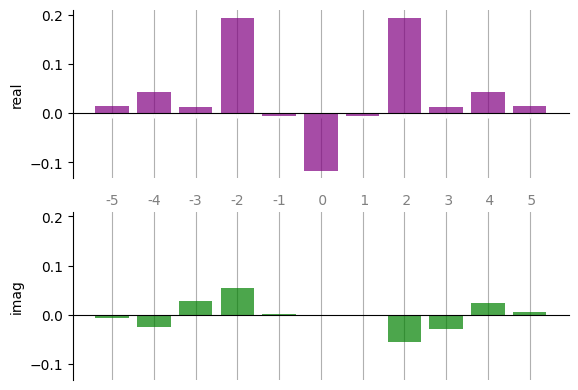

In [15]:
fourier.plot_coefficients()

So these are the coefficients of an agent that was able to solve the environment. What if we check the coefficients of a circuit with random parameters?

In [25]:
weights = np.random.uniform(0, 2*np.pi, size=(num_layers+1, num_qubits*2))

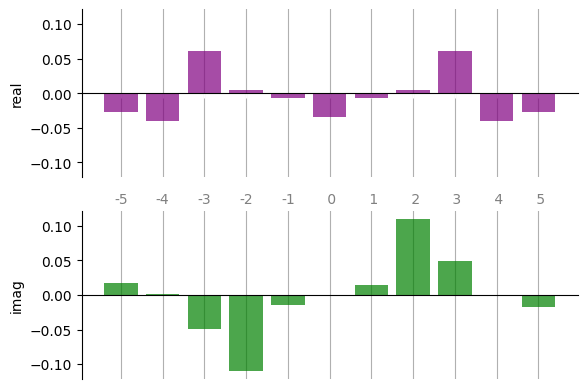

In [26]:
fourier.plot_coefficients(weights = weights)

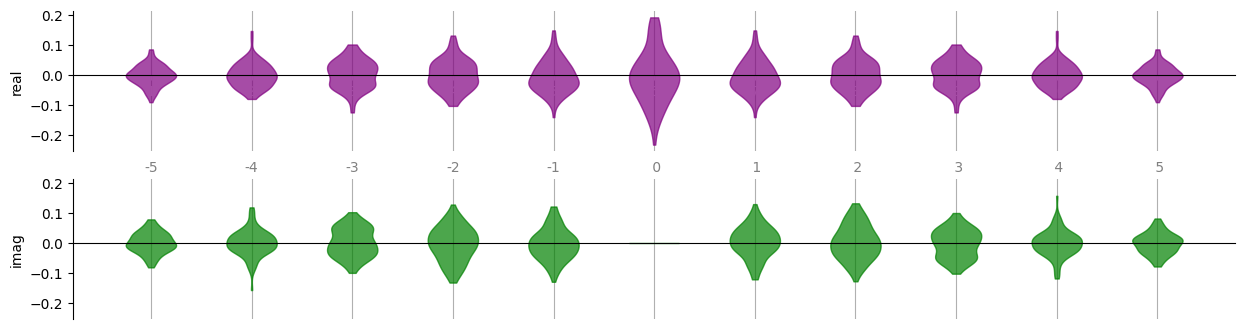

In [35]:
fourier.plot_random_coefficients_distribution()

Let's try and Analyze the difference between the final schuld datareup circuits, the final basic datareup circuits, and the baseline circuits.

In [3]:
# Let's start by loading the data needed
schuld_datareup_agents = []
basic_datareup_agents = []
baseline_agents = []

agents = [schuld_datareup_agents, basic_datareup_agents, baseline_agents]

path_schuld = "../../results/continuous/skolik_arch/schuld_datareup/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper/"
path_basic = "../../results/continuous/skolik_arch/basic_datareup/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper/"
path_baseline = "../../results/continuous/skolik_arch/baseline/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper/"

paths = [path_schuld, path_basic, path_baseline]

for i,path in enumerate(paths):
    pickle_files = [f for f in os.listdir(path) if f.endswith(".pkl")]
    for pickle_file in pickle_files:
        with open(os.path.join(path, pickle_file), 'rb') as f:
            agents[i].append(pickle.load(f))



In [4]:
# Let's pick a schuld_datareup agent that solved the environment
# To solve the environment, the last 10 episodes must have an average reward of 195 or higher

for i,agent in enumerate(schuld_datareup_agents):
    if np.mean(agent["episode_reward_history"][-10:]) >= 195:
        print("Agent {} solved the environment".format(i))
        break

# Let's pick a basic_datareup agent that solved the environment
# To solve the environment, the last 10 episodes must have an average reward of 195 or higher

for i,agent in enumerate(basic_datareup_agents):
    if np.mean(agent["episode_reward_history"][-10:]) >= 195:
        print("Agent {} solved the environment".format(i))
        break
    print("Agent {} did not solve the environment".format(i))


# Let's pick a baseline agent that solved the environment
# To solve the environment, the last 10 episodes must have an average reward of 195 or higher

for i,agent in enumerate(baseline_agents):
    if np.mean(agent["episode_reward_history"][-10:]) >= 195:
        print("Agent {} solved the environment".format(i))
        break
    print("Agent {} did not solve the environment".format(i))

Agent 0 solved the environment
Agent 0 solved the environment
Agent 0 solved the environment


It seems like agent 0 of all three types of circuits have solved the environment. Let's plot the moving average of the reward of the first agent of each type of circuit.

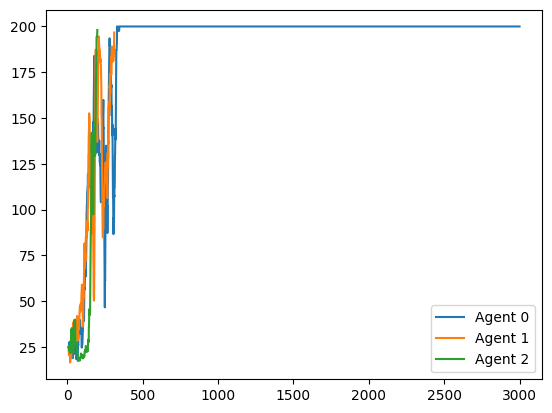

In [5]:
# Let's plot the moving average of 10 episodes of the reward history of the agent that solved the environment

import matplotlib.pyplot as plt
import pandas as pd


for i in range(len(agents)):
     plt.plot(pd.Series(agents[i][0]["episode_reward_history"]).rolling(10).mean(), label=f"Agent {i}")

plt.legend()
plt.show()



In [6]:
# Let's store the final weights of the parametrized rotations of the agents that solved the environment
schuld_datareup_weights = schuld_datareup_agents[0]["weights"]
basic_datareup_weights = basic_datareup_agents[0]["weights"]
baseline_weights = baseline_agents[0]["weights"]

In [38]:
#We only care about the rotational parameters

num_layers = 5
num_qubits = 4
circuit_arch = "skolik"
measurement = "ZZ"

schuld_datareup_parameters = np.reshape(schuld_datareup_weights[0], (num_layers+1, num_qubits*2))
basic_datareup_parameters = np.reshape(basic_datareup_weights[0], (num_layers, num_qubits*2))
baseline_parameters = np.reshape(baseline_weights[0], (num_layers, num_qubits*2))
data = np.random.uniform(-0.05,0.05)

schuld_datareup_outscaling_weights = schuld_datareup_agents[0]["weights"][-1]
basic_datareup_outscaling_weights = basic_datareup_agents[0]["weights"][-1]
baseline_outscaling_weights = baseline_agents[0]["weights"][-1]

In [8]:
fourier_analysis_schuld = Fourier_Analysis(num_qubits, num_layers, circuit_arch, "schuld", measurement, schuld_datareup_parameters, data)
fourier_analysis_basic = Fourier_Analysis(num_qubits, num_layers, circuit_arch, "basic", measurement, basic_datareup_parameters, data)
fourier_analysis_baseline = Fourier_Analysis(num_qubits, num_layers, circuit_arch, "baseline", measurement, baseline_parameters, data)

Let's start by looking at the circuit spectrum of these three types of circuits.

In [9]:
freqs_schuld = fourier_analysis_schuld.circuit_spectrum()
freqs_basic = fourier_analysis_basic.circuit_spectrum()
freqs_baseline = fourier_analysis_baseline.circuit_spectrum()

In [10]:
print("Schuld DataReup Frequency spectrum: \n", freqs_schuld)
print("\n")
print("Basic DataReup Frequency spectrum: \n", freqs_basic)
print("\n")
print("Baseline Frequency spectrum: \n", freqs_baseline)

Schuld DataReup Frequency spectrum: 
 {'x_0': [-5.0, -4.0, -3.0, -2.0, -1.0, 0, 1.0, 2.0, 3.0, 4.0, 5.0], 'x_1': [-5.0, -4.0, -3.0, -2.0, -1.0, 0, 1.0, 2.0, 3.0, 4.0, 5.0], 'x_2': [-5.0, -4.0, -3.0, -2.0, -1.0, 0, 1.0, 2.0, 3.0, 4.0, 5.0], 'x_3': [-5.0, -4.0, -3.0, -2.0, -1.0, 0, 1.0, 2.0, 3.0, 4.0, 5.0]}


Basic DataReup Frequency spectrum: 
 {'x_0': [-5.0, -4.0, -3.0, -2.0, -1.0, 0, 1.0, 2.0, 3.0, 4.0, 5.0], 'x_1': [-5.0, -4.0, -3.0, -2.0, -1.0, 0, 1.0, 2.0, 3.0, 4.0, 5.0], 'x_2': [-5.0, -4.0, -3.0, -2.0, -1.0, 0, 1.0, 2.0, 3.0, 4.0, 5.0], 'x_3': [-5.0, -4.0, -3.0, -2.0, -1.0, 0, 1.0, 2.0, 3.0, 4.0, 5.0]}


Baseline Frequency spectrum: 
 {'x_0': [-1.0, 0, 1.0], 'x_1': [-1.0, 0, 1.0], 'x_2': [-1.0, 0, 1.0], 'x_3': [-1.0, 0, 1.0]}


As expected, the Basic DataReup circuit and Schuld DataReup circuit both have a frequency spectrum that goes from -5 to 5 (degree 5), because we repeat the data encoding gates every layer, thus increasing the degree of the circuit. The baseline circuit has a frequency spectrum that goes from -1 to 1 (degree 1), because we only encode the data once (at the begginning of the circuit).

Now, let's look at the coefficients of the first agent of each type of circuit.

In [11]:
coeffs_schuld = fourier_analysis_schuld.fourier_coefficients()
coeffs_basic = fourier_analysis_basic.fourier_coefficients()
coeffs_baseline = fourier_analysis_baseline.fourier_coefficients()

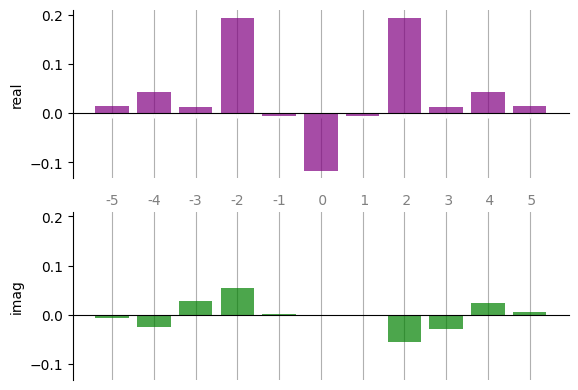

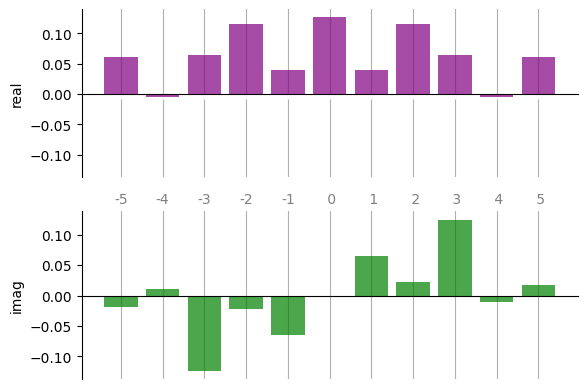

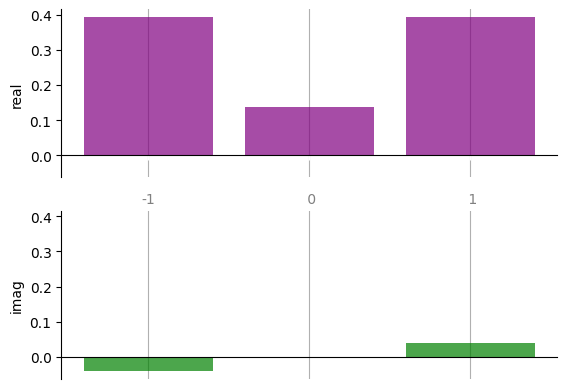

In [12]:
fourier_analysis_schuld.plot_coefficients()
fourier_analysis_basic.plot_coefficients()
fourier_analysis_baseline.plot_coefficients()

In [13]:
freqs_schuld["x_0"]

[-5.0, -4.0, -3.0, -2.0, -1.0, 0, 1.0, 2.0, 3.0, 4.0, 5.0]

In [16]:
coeffs_schuld

array([-0.11699441+0.j        , -0.00581249-0.00072109j,
        0.19357604-0.05552114j,  0.01301899-0.02781458j,
        0.04225475+0.02375699j,  0.01466952+0.00581159j,
        0.01466952-0.00581159j,  0.04225475-0.02375699j,
        0.01301899+0.02781458j,  0.19357604+0.05552114j,
       -0.00581249+0.00072109j])

In [28]:
aux_coeffs_schuld = []
aux_coeffs_basic = []
aux_coeffs_baseline = []

aux_coeffs_schuld.append(coeffs_schuld[-1])
aux_coeffs_schuld.append(coeffs_schuld[-2])
aux_coeffs_schuld.append(coeffs_schuld[-3])
aux_coeffs_schuld.append(coeffs_schuld[-4])
aux_coeffs_schuld.append(coeffs_schuld[-5])
aux_coeffs_schuld.append(coeffs_schuld[0])
aux_coeffs_schuld.append(coeffs_schuld[1])
aux_coeffs_schuld.append(coeffs_schuld[2])
aux_coeffs_schuld.append(coeffs_schuld[3])
aux_coeffs_schuld.append(coeffs_schuld[4])
aux_coeffs_schuld.append(coeffs_schuld[5])

aux_coeffs_basic.append(coeffs_basic[-1])
aux_coeffs_basic.append(coeffs_basic[-2])
aux_coeffs_basic.append(coeffs_basic[-3])
aux_coeffs_basic.append(coeffs_basic[-4])
aux_coeffs_basic.append(coeffs_basic[-5])
aux_coeffs_basic.append(coeffs_basic[0])
aux_coeffs_basic.append(coeffs_basic[1])
aux_coeffs_basic.append(coeffs_basic[2])
aux_coeffs_basic.append(coeffs_basic[3])
aux_coeffs_basic.append(coeffs_basic[4])
aux_coeffs_basic.append(coeffs_basic[5])

aux_coeffs_baseline.append(coeffs_baseline[-1])
aux_coeffs_baseline.append(coeffs_baseline[0])
aux_coeffs_baseline.append(coeffs_baseline[1])

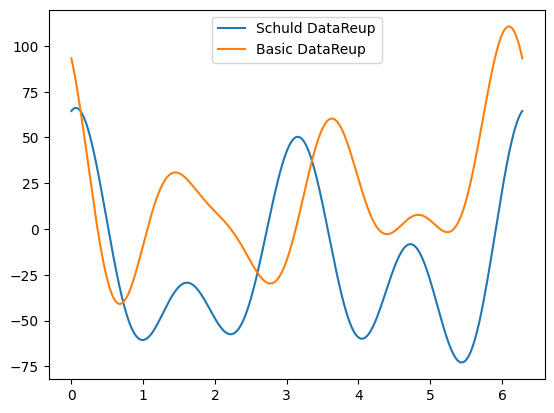

In [39]:
t = np.linspace(0, 2*np.pi, num = 1000)

amplitudes_schuld = np.abs(aux_coeffs_schuld) * schuld_datareup_outscaling_weights[0][0]
phases_schuld = np.angle(aux_coeffs_schuld)

amplitudes_basic = np.abs(aux_coeffs_basic) * basic_datareup_outscaling_weights[0][0]
phases_basic = np.angle(aux_coeffs_basic)

amplitudes_baseline = np.abs(aux_coeffs_baseline) * baseline_outscaling_weights[0][0]
phases_baseline = np.angle(aux_coeffs_baseline)

fourier_series_schuld = np.zeros_like(t)
for i, freq in enumerate(freqs_schuld["x_0"]):
    fourier_series_schuld += amplitudes_schuld[i] * np.cos(freq * t + phases_schuld[i])

fourier_series_basic = np.zeros_like(t)
for i, freq in enumerate(freqs_basic["x_0"]):
    fourier_series_basic += amplitudes_basic[i] * np.cos(freq * t + phases_basic[i])

fourier_series_baseline = np.zeros_like(t)
for i, freq in enumerate(freqs_baseline["x_0"]):
    fourier_series_baseline += amplitudes_baseline[i] * np.cos(freq * t + phases_baseline[i])

plt.plot(t, fourier_series_schuld, label = "Schuld DataReup")
plt.plot(t, fourier_series_basic, label = "Basic DataReup")
plt.legend()
plt.show()
